# Firearm Deaths by State - Referenced Against Rated 'Gun-friendliness' Of the State

In [1]:
import pandas as pd

In [118]:
# gun-friendly index, via https://www.1point21interactive.com/maps/ag/friendliest-gun-owner-states.html via https://www.az-defenders.com/best-states-for-gun-owners/
gfi = [{"state":"Alabama","value":"96.14","note":"Rank #15"},{"state":"Alaska","value":"122.9","note":"Rank #1"},{"state":"Arizona","value":"119.26","note":"Rank #2"},{"state":"Arkansas","value":"81.12","note":"Rank #25"},{"state":"California","value":"24.06","note":"Rank #48"},{"state":"Colorado","value":"57.01","note":"Rank #39"},{"state":"Connecticut","value":"27.29","note":"Rank #46"},{"state":"Delaware","value":"53.87","note":"Rank #40"},{"state":"District of Columbia","value":"18.8","note":"Rank #51"},{"state":"Florida","value":"71.3","note":"Rank #30"},{"state":"Georgia","value":"84.67","note":"Rank #23"},{"state":"Hawaii","value":"27.59","note":"Rank #45"},{"state":"Idaho","value":"110.22","note":"Rank #5"},{"state":"Illinois","value":"72.73","note":"Rank #29"},{"state":"Indiana","value":"87.17","note":"Rank #22"},{"state":"Iowa","value":"80.58","note":"Rank #26"},{"state":"Kansas","value":"104.81","note":"Rank #8"},{"state":"Kentucky","value":"108.83","note":"Rank #7"},{"state":"Louisiana","value":"67.57","note":"Rank #34"},{"state":"Maine","value":"43.74","note":"Rank #41"},{"state":"Maryland","value":"30.22","note":"Rank #43"},{"state":"Massachusetts","value":"20.61","note":"Rank #49"},{"state":"Michigan","value":"90.98","note":"Rank #20"},{"state":"Minnesota","value":"68.05","note":"Rank #33"},{"state":"Mississippi","value":"94.49","note":"Rank #18"},{"state":"Missouri","value":"104.79","note":"Rank #9"},{"state":"Montana","value":"115.26","note":"Rank #4"},{"state":"Nebraska","value":"76.53","note":"Rank #27"},{"state":"Nevada","value":"93.11","note":"Rank #19"},{"state":"New Hampshire","value":"94.58","note":"Rank #17"},{"state":"New Jersey","value":"24.18","note":"Rank #47"},{"state":"New Mexico","value":"87.75","note":"Rank #21"},{"state":"New York","value":"10.7","note":"Rank #50"},{"state":"North Carolina","value":"69.65","note":"Rank #32"},{"state":"North Dakota","value":"97.22","note":"Rank #14"},{"state":"Ohio","value":"70.85","note":"Rank #31"},{"state":"Oklahoma","value":"108.85","note":"Rank #6"},{"state":"Oregon","value":"61.3","note":"Rank #37"},{"state":"Pennsylvania","value":"75.86","note":"Rank #28"},{"state":"Rhode Island","value":"29.58","note":"Rank #44"},{"state":"South Carolina","value":"63.53","note":"Rank #36"},{"state":"South Dakota","value":"102.9","note":"Rank #11"},{"state":"Tennessee","value":"95.47","note":"Rank #16"},{"state":"Texas","value":"103.68","note":"Rank #10"},{"state":"Utah","value":"98.42","note":"Rank #12"},{"state":"Vermont","value":"81.69","note":"Rank #24"},{"state":"Virginia","value":"59.65","note":"Rank #38"},{"state":"Washington","value":"33.37","note":"Rank #42"},{"state":"West Virginia","value":"97.36","note":"Rank #13"},{"state":"Wisconsin","value":"66.04","note":"Rank #35"},{"state":"Wyoming","value":"117.08","note":"Rank #3"}]
gfi = pd.DataFrame(gfi).rename(columns={'state':'State'})

# firearm deaths, from CDC https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm (download and read)
deaths = pd.read_csv('undefined.csv')

# state shortcodes
shortcodes = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]
shortcodes.columns = ['State', 'Abbrev', 'STATE']

# state populations
pops = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')[0].iloc[:, 2:4]
pops.columns = ['State', 'Population']

# presidential margin, downloaded from Cook Political Report https://cookpolitical.com/2020-national-popular-vote-tracker
election = pd.read_csv('/content/Popular vote backend - Sheet1.csv')[['state', 'dem_this_margin']].rename(columns={'state': 'State'})

data = gfi.merge(shortcodes).merge(deaths.query('YEAR == 2020')).merge(pops).merge(election)
data['rank'] = data.note.apply(lambda x: int(x.split('#')[-1]))
data['margin'] = data.dem_this_margin.apply(lambda x: float(x.replace('%', '')))
data = data.sort_values('rank')
data.sample()

,State,value,note,Abbrev,STATE,YEAR,RATE,DEATHS,URL,Population,dem_this_margin,rank,margin
37,Pennsylvania,75.86,Rank #28,Pa.,PA,2020,13.6,1752,/nchs/pressroom/states/pennsylvania/pa.htm,12801989,1.2%,28,1.2


Text(0, 2.2, '† CDC (2020)\n* AZ Defender (2020)\n^Color denotes 2020 election margin')

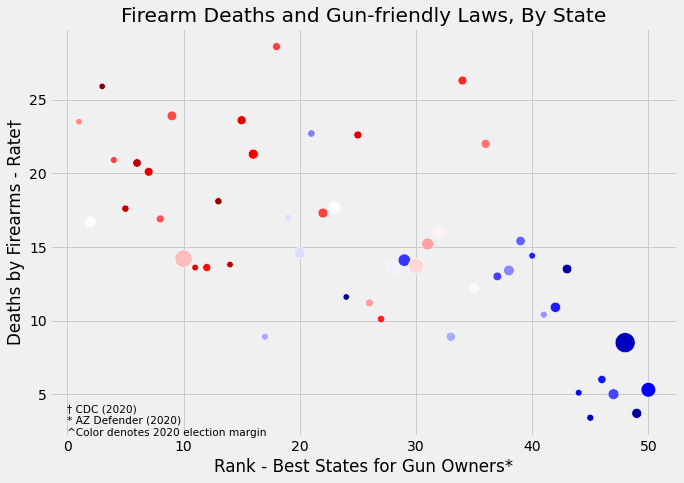

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
max_margin = data.margin.abs().max()
ax = sns.scatterplot(
    data=data, x="rank", y="RATE", size="Population", sizes=(40, 400), legend=False,
    hue='margin', hue_norm=(-max_margin,max_margin), palette='seismic_r'
)
plt.xlabel('Rank - Best States for Gun Owners*')
plt.ylabel('Deaths by Firearms - Rate†')
plt.title('Firearm Deaths and Gun-friendly Laws, By State')

ax.annotate('† CDC (2020)\n* AZ Defender (2020)\n^Color denotes 2020 election margin',
            xy = (0, 2.2), fontsize=10.5)

In [76]:
data

,State,value,note,Abbrev,STATE,YEAR,RATE,DEATHS,URL,Population,rank
1,Alaska,122.9,Rank #1,Alaska,AK,2020,23.5,175,/nchs/pressroom/states/alaska/ak.htm,731545,1
2,Arizona,119.26,Rank #2,Ariz.,AZ,2020,16.7,1265,/nchs/pressroom/states/arizona/az.htm,7278717,2
49,Wyoming,117.08,Rank #3,Wyo.,WY,2020,25.9,154,/nchs/pressroom/states/wyoming/wy.htm,578759,3
25,Montana,115.26,Rank #4,Mont.,MT,2020,20.9,238,/nchs/pressroom/states/montana/mt.htm,1068778,4
11,Idaho,110.22,Rank #5,Idaho,ID,2020,17.6,321,/nchs/pressroom/states/idaho/id.htm,1787065,5
35,Oklahoma,108.85,Rank #6,Okla.,OK,2020,20.7,826,/nchs/pressroom/states/oklahoma/ok.htm,3956971,6
16,Kentucky,108.83,Rank #7,Ky.,KY,2020,20.1,902,/nchs/pressroom/states/kentucky/ky.htm,4467673,7
15,Kansas,104.81,Rank #8,Kans.,KS,2020,16.9,494,/nchs/pressroom/states/kansas/ks.htm,2913314,8
24,Missouri,104.79,Rank #9,Mo.,MO,2020,23.9,1426,/nchs/pressroom/states/missouri/mo.htm,6137428,9
42,Texas,103.68,Rank #10,Tex.,TX,2020,14.2,4164,/nchs/pressroom/states/texas/tx.htm,28995881,10
